# Markovův řetězec a sukcese lesa

Markovův řetězec je jeden z nejjednodušších modelů popisujících systém, který se
může nacházet v různých stavech a mezi těmito stavy se náhodně přepíná podle
předem daných pravděpodobností. Pro jeho popis je vhodný matematický aparát
založený na teorii matic. Následující ukázka aplikace při studiu populací je z
knihy Ekologie: jedinci, populace a společenstva autorů Begon, M. and Townsend, C.R. and Harper, J.L.

Americký vědec H. S. Horn studoval druhovou skladbu lesa a vycházel z
předpokladů, že existuje konstantní pravděpodobnost, že určitý druh je nahrazen
jiným druhem. Tabulka pravděpodobností je níže. Pro každý současný druh jsou v
řádku pravděpodobnosti, že tento druh bude za 50 let nahrazen druhem ze záhlaví
příslušného sloupce. Například pravděpodobnost toho, že na stanovišti, kde nyní
roste bříza topololistá poroste za 50 let červený javor je 50% (první řádek,
třetí sloupec). Pravděpodobnost toho, že na stanovišti, kde nyní roste javor za
50 let poroste bříza je nulová (třetí řádek, první sloupec). Model předpokládá,
že i když se dřevina v lokalitě nevyskytuje, existuje zdroj semen a dřevina se
na této lokalitě může objevit.

<style>
  .tabulka table {
    table-layout:fixed 
  }
</style>  

<div class="tabulka">

||Bříza topololistá|Tupela lesní|Javor červený|Buk|
|---------|--:|--:|--:|--:|
|Bříza topololistá|0.05|0.36|0.50|0.09|
|Tupela lesní|0.01|0.57|0.25|0.17|
|Javor červený|0.00|0.14|0.55|0.31|
|Buk | 0.00|0.01|0.03|0.96|

</div>

Procentuální zastoupení jednotlivých druhů budeme charakterizovat vektorem, kde
hodnoty pro stromy budou ve stejném pořadí, jako jsou stromy seřazeny v naší
tabulce. Pokud například je zastoupena napůl bříza a buk, odpovídá to vektoru
$v(0) = (50,0,0,50)^T.$ 

Procentuální zastoupení každého druhu se bude měnit z období na období.
Například procentuální zastoupení  javoru v dalším období bude dáno
procentuálním zastoupením javoru v současnosti a pravděpodobností, že se na
stanovišti udrží a dále procentuálním
zastoupením ostatních dřevin a pravděpodobností, že tato dřevina bude nahrazena
javorem. Tedy pro javor a vektor procentuálního zastoupení $v = (v_1,v_2,v_3,v_4)^T$ to
bude 
$$
  0.50 v_1 + 0.25v_2 + 0.55 v_3 + 0.03 v_4
$$
Při použití maticového součinu vektoru rozložení zastoupení s maticí
pravděpodobností
$$M=\begin{pmatrix}
0.05 & 0.01 & 0 & 0\cr
0.36& 0.57& 0.14&0.01\cr
0.50&0.25&0.55&0.03\cr
0.09&0.17&0.31&0.96
\end{pmatrix}$$
je zastoupení dřevin v následujícím období dáno vzorcem
$$v(k+1)=Mv(k).$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
M = np.matrix([0.05, 0.36, 0.50, 0.09,
              0.01, 0.57, 0.25, 0.17,
              0.0,0.14,0.55,0.31,
              0.0,0.01,0.03,0.96]).reshape(4,4).T
M

matrix([[0.05, 0.01, 0.  , 0.  ],
        [0.36, 0.57, 0.14, 0.01],
        [0.5 , 0.25, 0.55, 0.03],
        [0.09, 0.17, 0.31, 0.96]])



Zkusíme si namodelovat 20 období, tj. tisíc let vývoje. K tomu si připravíme
pole do kterého budeme ukládat data. Výchozím stavem bude rovnoměrné zastoupení
všech druhů. Vývoj jednotlivých dřevin zachytíme graficky.


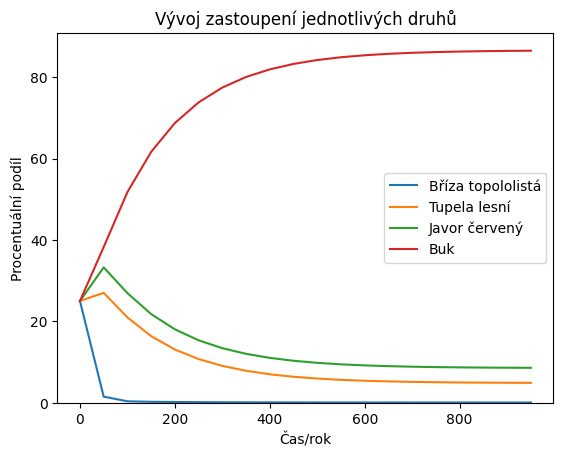

In [2]:
N = 20
X_init = [25, 25, 25, 25]

X = np.zeros((4, N))
X[:, 0] = X_init
for i in range(N - 1):
    X[:, i + 1] = M @ X[:, i]

fig, ax = plt.subplots()
t = np.array(range(N))*50
plt.plot(t,X.T)
plt.legend(["Bříza topololistá", "Tupela lesní", "Javor červený", "Buk"])
ax.set(
    title="Vývoj zastoupení jednotlivých druhů",
    ylim=(0,None),
    ylabel="Procentuální podíl", 
    xlabel="Čas/rok");


Ze simulace se zdá, že poměr dřevin se postupně stabilizuje. 
Z matematického hlediska se procentuální zastoupení dřevin nemění, pokud se
vektor zobrazí sám na sebe. Ověříme, že to tak opravdu je.


In [3]:
X_final = X[:, [-1]]
print(X_final.ravel())  # array se převede na 1D pomocí ravel
print((M @ X_final).ravel())

[5.16464021e-02 4.88304501e+00 8.57619685e+00 8.64891117e+01]
[[5.14127702e-02 4.86748704e+00 8.55816607e+00 8.65229341e+01]]


Pokud bychom chtěli simulaci ne po 50 letech, ale po 100 letech, můžeme maticí
vynásobit dvakrát. To je v konečném důsledku stejné, jako bychom násobili druhou
mocninou. Pokud bychom chtěli delší časový interval, použijeme vyšší mocninu.
Následující výpočet ukazuje, že pro dostatečně velkou mocninu vychází všechny
sloupce matice stejné a jsou rovny výslednému poměru mezi jednotlivými
dřevinami.

In [4]:
M**50

matrix([[5.08240327e-04, 5.08240330e-04, 5.08240173e-04, 5.08239864e-04],
        [4.82828193e-02, 4.82828195e-02, 4.82828090e-02, 4.82827884e-02],
        [8.51272964e-02, 8.51272966e-02, 8.51272845e-02, 8.51272607e-02],
        [8.66081644e-01, 8.66081644e-01, 8.66081666e-01, 8.66081711e-01]])

Další uplatnění Markovových řetězců je například při předpovědi počasí a jejím
zpřesněním na lokální úroveň. Používá informace o tom, s jakou pravděpodobností
je jeden druh počasí zachován či vystřídán druhým. 

